In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

from source.utils import load_and_clean_data, kolmogorov_smirnov
from source.regression_analysis import perform_regression, perform_anova_test
from source.pca_analysis import perform_pca, plot_variance_ratios
from source.pca_analysis import plot_circle_of_correlations, plot_projection

### Exploratory Data Analysis

In [2]:
df = load_and_clean_data("Data/Life_exp.csv")

Missing value counts for each column:
Year                                                                                                    0
Year Code                                                                                               0
Country Name                                                                                            0
Country Code                                                                                            0
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]                           315
Adults (ages 15+) and children (0-14 years) living with HIV [SH.HIV.TOTL]                           12033
Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]                 12428
Antiretroviral therapy coverage (% of people living with HIV) [SH.HIV.ARTC.ZS]                      12994
Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV) [SH.HIV.PMTC.ZS]    14510
Birth ra

In [3]:
df.head()

,Adolescent fertility rate,Adults and children living with HIV,Antiretroviral therapy coverage,"Birth rate, crude",Hospital beds,Life expectancy at birth,People using safely managed drinking water services,Population growth,Unemployment
0,152.572,4100,0,49.664,0.30,55.298000,11.093326,1.443803,7.942
1,14.792,200,0,17.076,3.26,75.404000,49.138321,-0.637357,19.028
2,36.644,200,0,12.510,6.44,70.624000,82.350719,-1.176786,11.023
3,33.890,2800,0,14.500,8.69,64.891000,57.748555,0.821520,11.780
4,26.695,2100,0,9.400,12.61,68.912195,81.812707,-0.471131,12.169


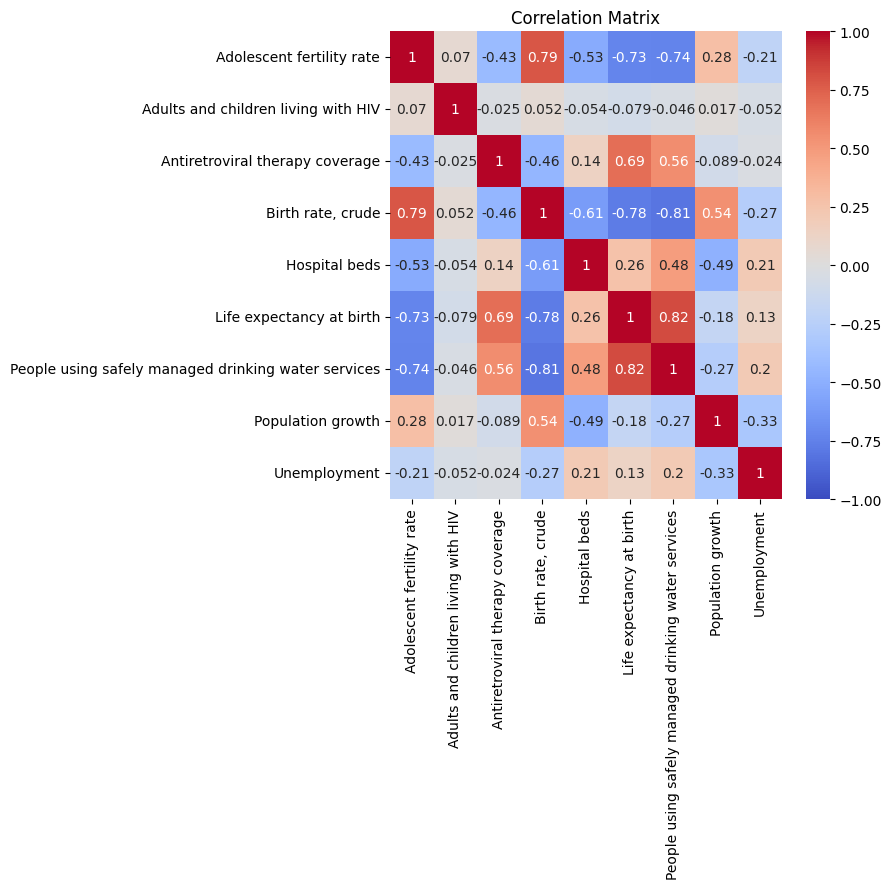

In [4]:
# Plot correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

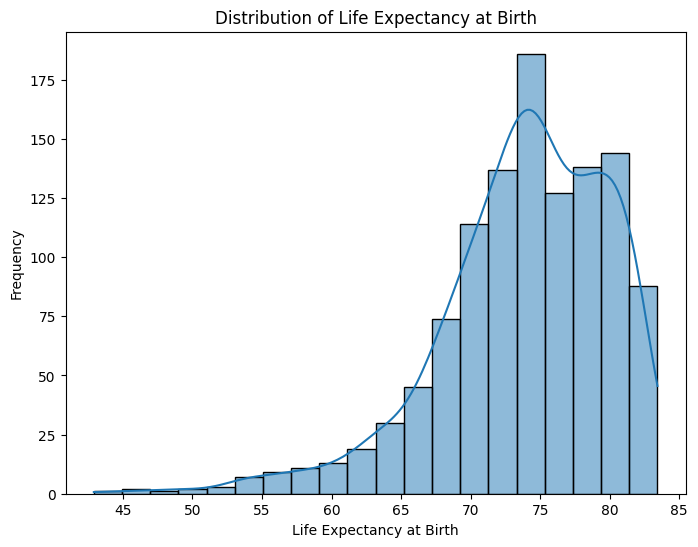

In [5]:
# Histogram of Life Expectancy at Birth
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Life expectancy at birth', bins=20, kde=True)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

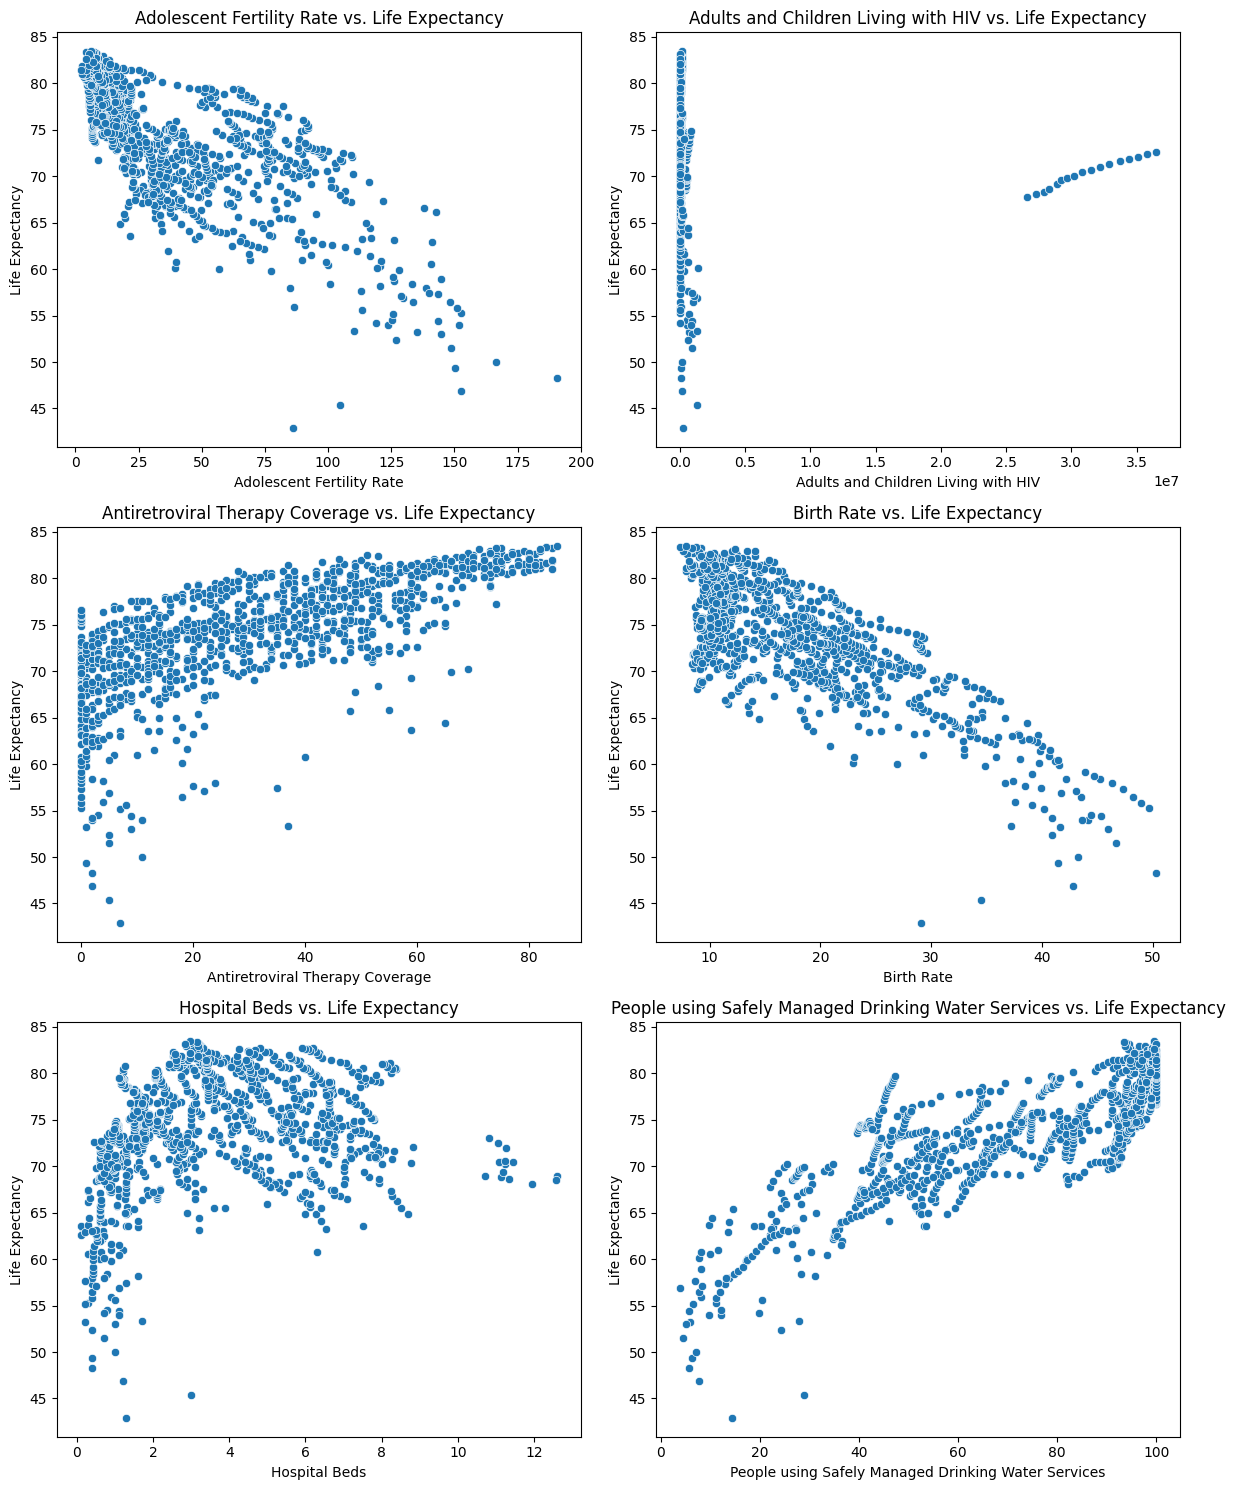

In [6]:
# Scatter plots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Adolescent Fertility Rate vs. Life Expectancy
sns.scatterplot(data=df, x='Adolescent fertility rate', 
                y='Life expectancy at birth', ax=axes[0, 0])
axes[0, 0].set_title('Adolescent Fertility Rate vs. Life Expectancy')
axes[0, 0].set_xlabel('Adolescent Fertility Rate')
axes[0, 0].set_ylabel('Life Expectancy')

# Adults and Children Living with HIV vs. Life Expectancy
sns.scatterplot(data=df, x='Adults and children living with HIV', 
                y='Life expectancy at birth', ax=axes[0, 1])
axes[0, 1].set_title('Adults and Children Living with HIV vs. Life Expectancy')
axes[0, 1].set_xlabel('Adults and Children Living with HIV')
axes[0, 1].set_ylabel('Life Expectancy')

# Antiretroviral Therapy Coverage vs. Life Expectancy
sns.scatterplot(data=df, x='Antiretroviral therapy coverage', 
                y='Life expectancy at birth', ax=axes[1, 0])
axes[1, 0].set_title('Antiretroviral Therapy Coverage vs. Life Expectancy')
axes[1, 0].set_xlabel('Antiretroviral Therapy Coverage')
axes[1, 0].set_ylabel('Life Expectancy')

# Birth Rate vs. Life Expectancy
sns.scatterplot(data=df, x='Birth rate, crude', 
                y='Life expectancy at birth', ax=axes[1, 1])
axes[1, 1].set_title('Birth Rate vs. Life Expectancy')
axes[1, 1].set_xlabel('Birth Rate')
axes[1, 1].set_ylabel('Life Expectancy')

# Hospital Beds vs. Life Expectancy
sns.scatterplot(data=df, x='Hospital beds', 
                y='Life expectancy at birth', ax=axes[2, 0])
axes[2, 0].set_title('Hospital Beds vs. Life Expectancy')
axes[2, 0].set_xlabel('Hospital Beds')
axes[2, 0].set_ylabel('Life Expectancy')

# People using safely managed drinking water services vs. Life Expectancy
sns.scatterplot(data=df, x='People using safely managed drinking water services', 
                y='Life expectancy at birth', ax=axes[2, 1])
axes[2, 1].set_title('People using Safely Managed Drinking Water Services vs. Life Expectancy')
axes[2, 1].set_xlabel('People using Safely Managed Drinking Water Services')
axes[2, 1].set_ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

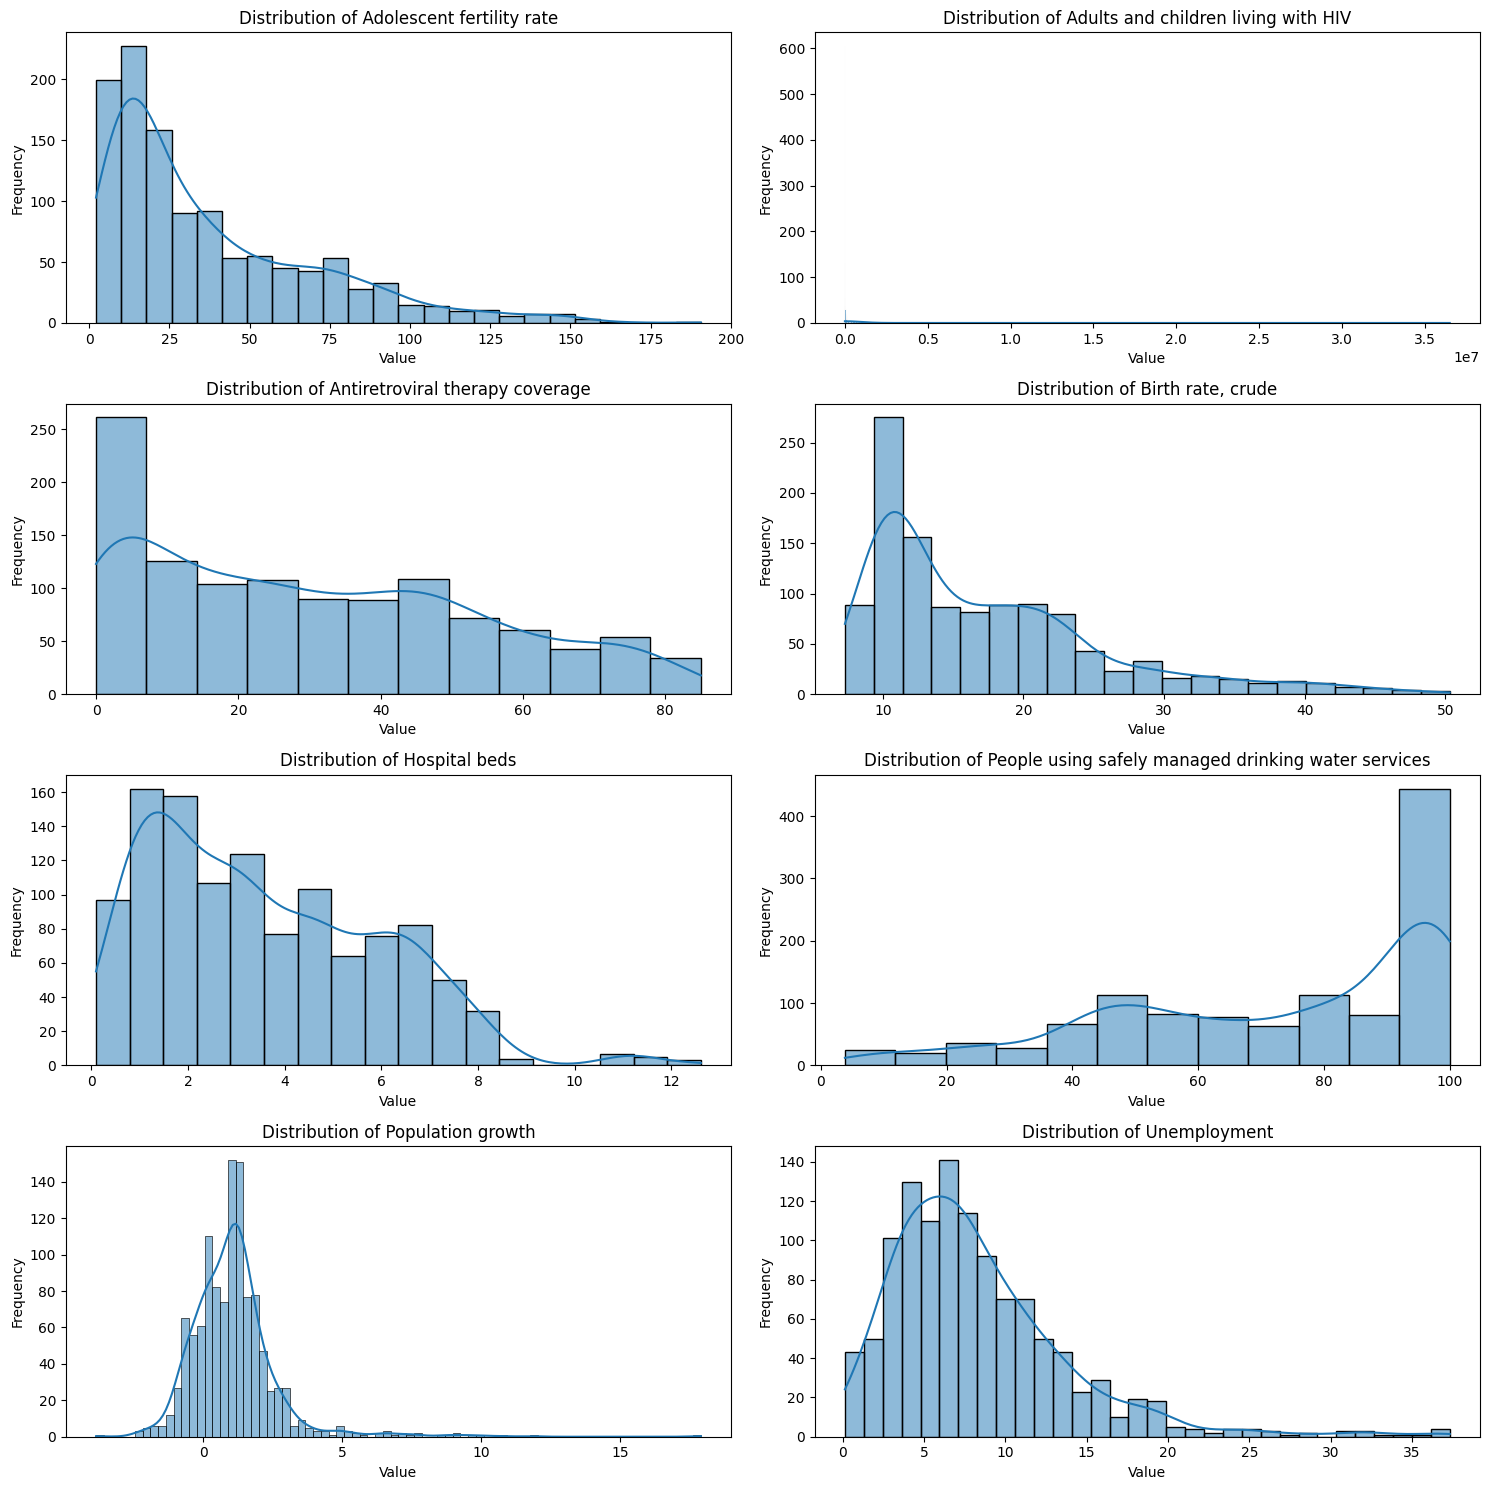

In [7]:
# Define the columns for distribution plots
columns_for_distribution = list(df.drop('Life expectancy at birth', axis=1).columns)

# Plotting distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

for i, column in enumerate(columns_for_distribution):
    sns.histplot(df[column], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')
    axes[i // 2, i % 2].set_xlabel('Value')
    axes[i // 2, i % 2].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(columns_for_distribution), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

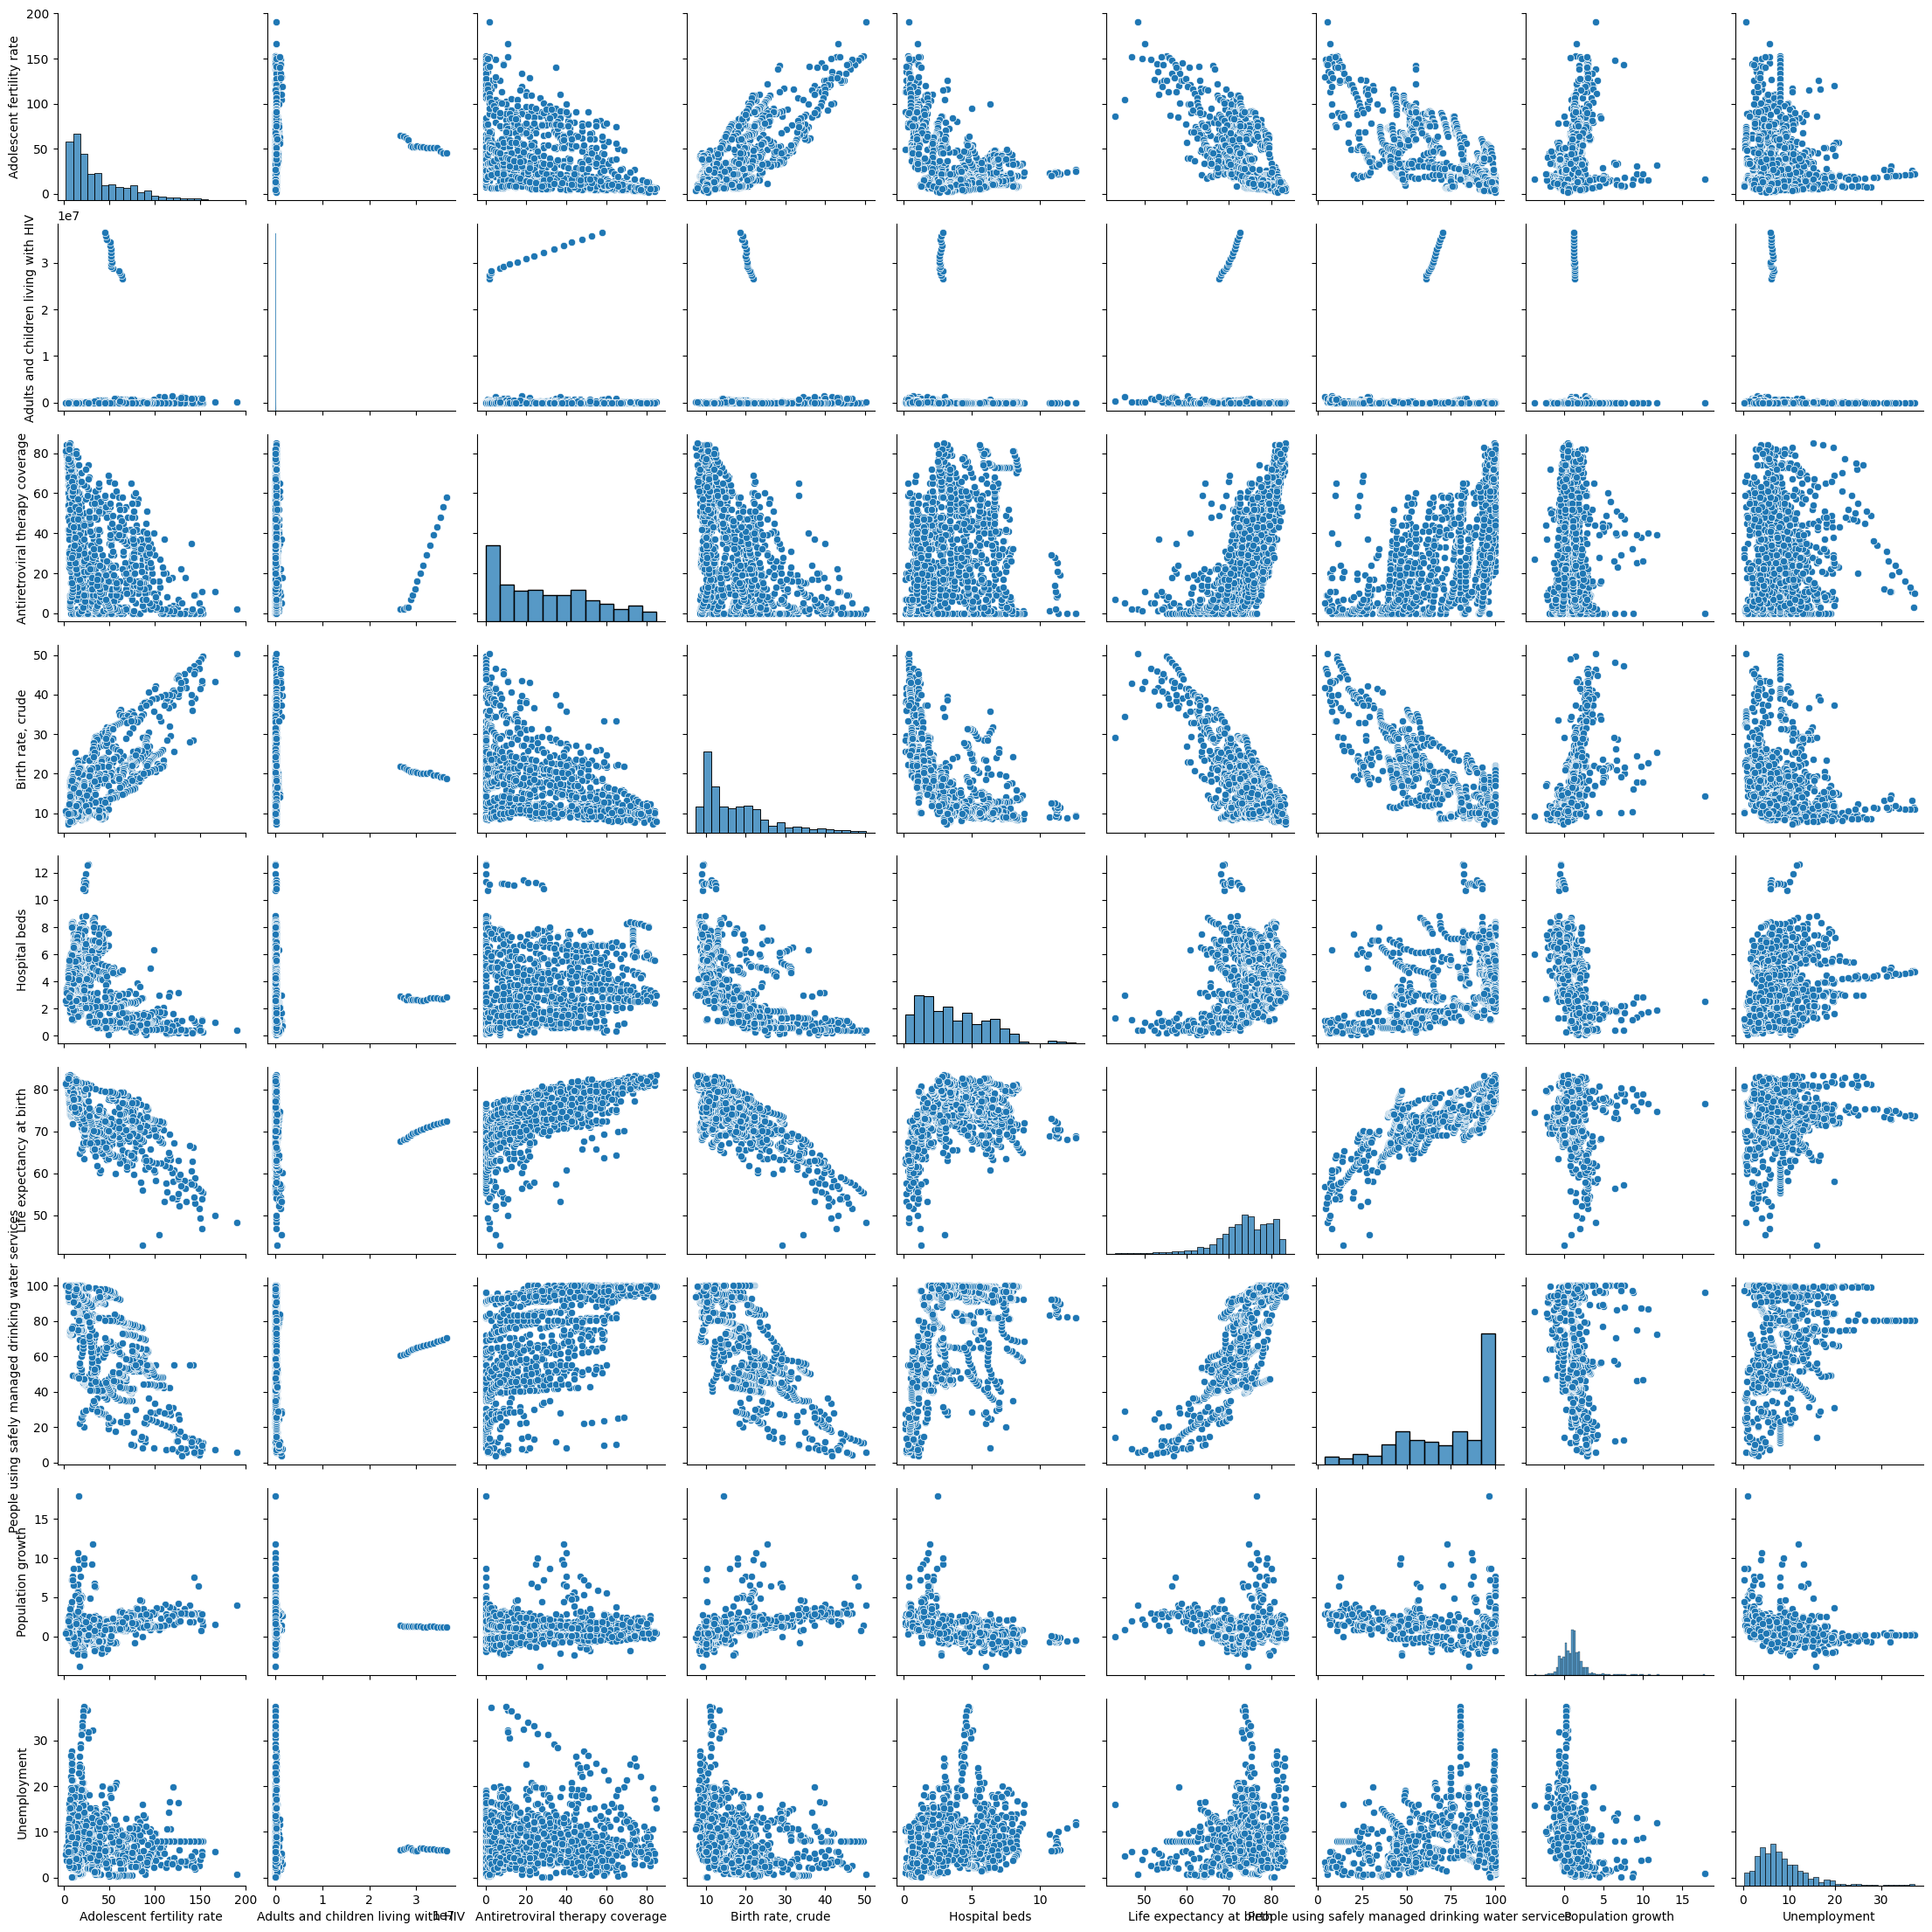

In [8]:
# Creating the pairplot
sns.pairplot(df)
plt.show()

In [9]:
kolmogorov_smirnov(df)

Kolmogorov-Smirnov Test Results:

Adolescent fertility rate: Not Normal
Adults and children living with HIV: Not Normal
Antiretroviral therapy coverage: Not Normal
Birth rate, crude: Not Normal
Hospital beds: Not Normal
Life expectancy at birth: Not Normal
People using safely managed drinking water services: Not Normal
Population growth: Not Normal
Unemployment: Not Normal


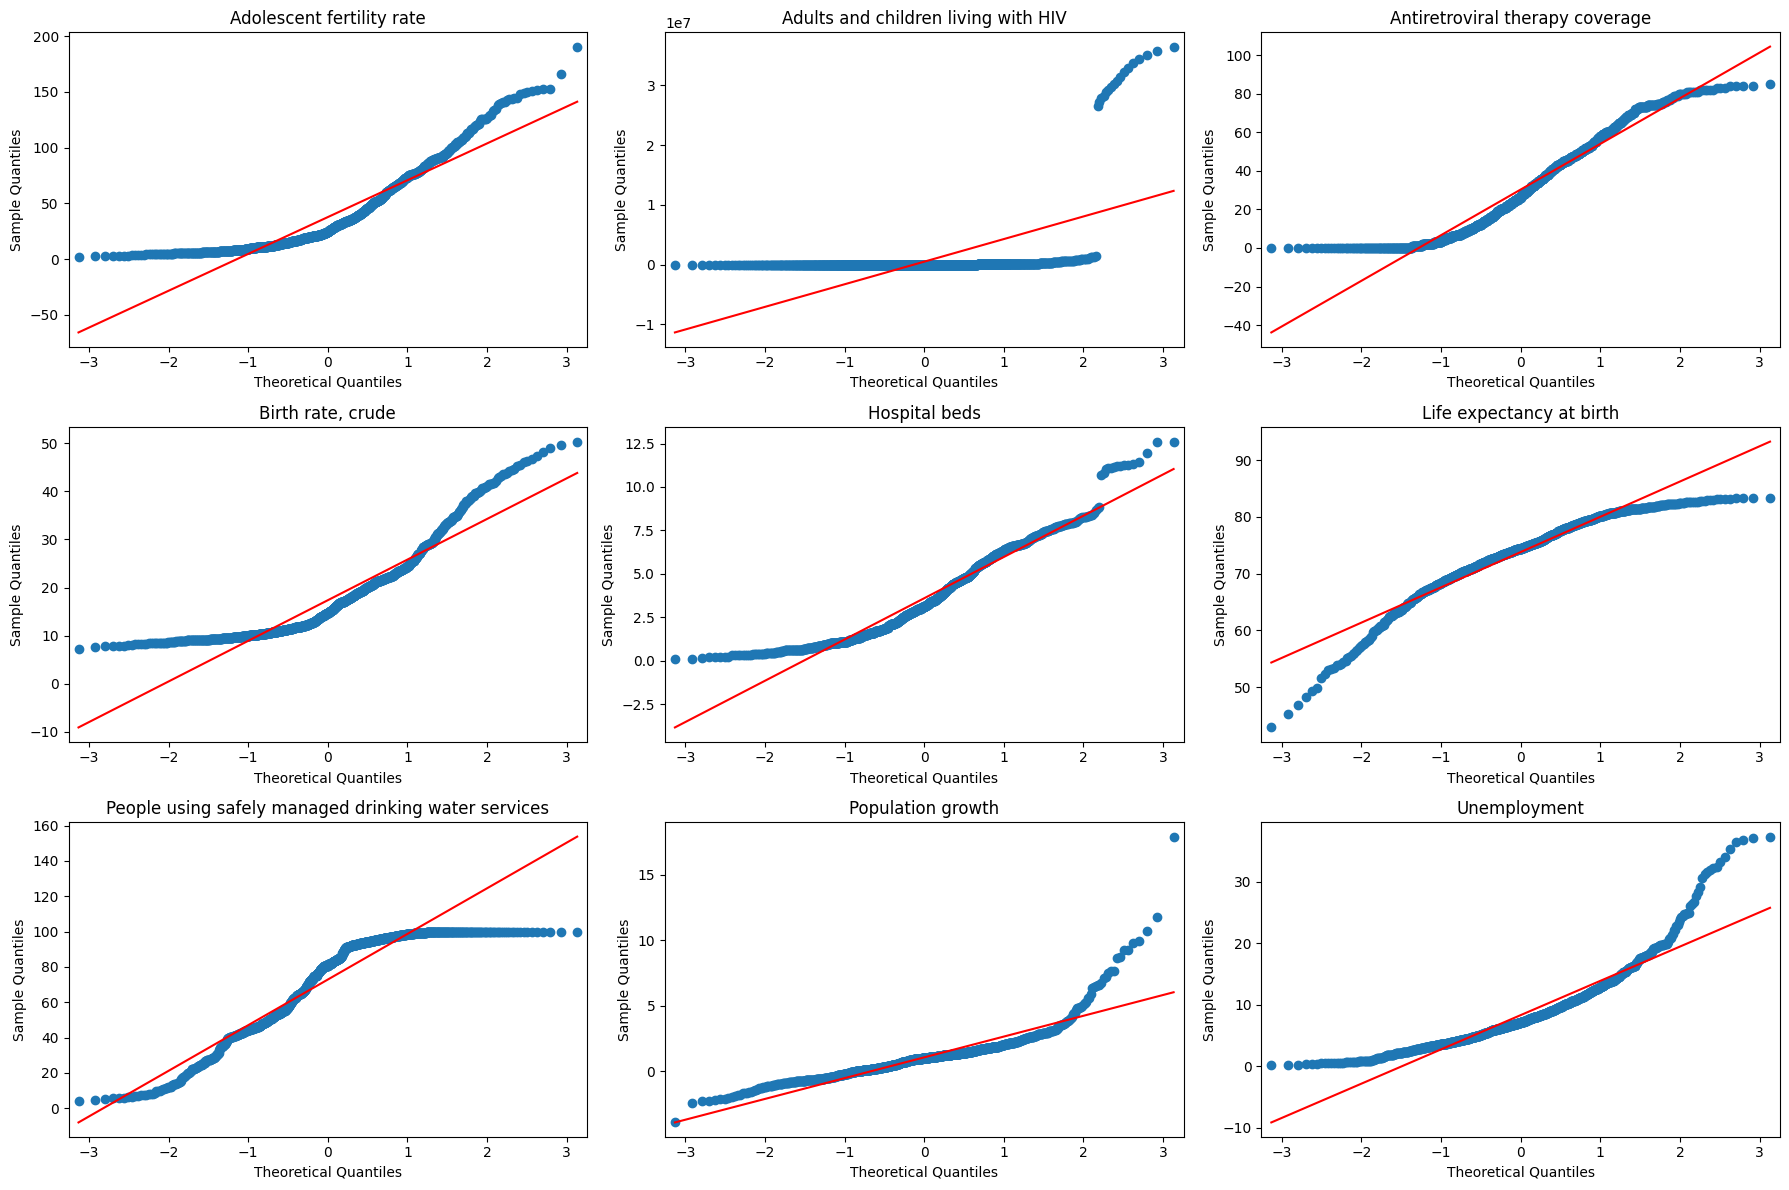

In [10]:
# Generate Q-Q plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    qqplot(df[col].dropna(), line='s', ax=plt.gca())
    plt.title(col)

plt.tight_layout()
plt.show()

### Linear Regression

                               OLS Regression Results                               
Dep. Variable:     Life expectancy at birth   R-squared:                       0.864
Model:                                  OLS   Adj. R-squared:                  0.863
Method:                       Least Squares   F-statistic:                     721.6
Date:                      Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                              11:54:07   Log-Likelihood:                -2045.5
No. Observations:                       920   AIC:                             4109.
Df Residuals:                           911   BIC:                             4152.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

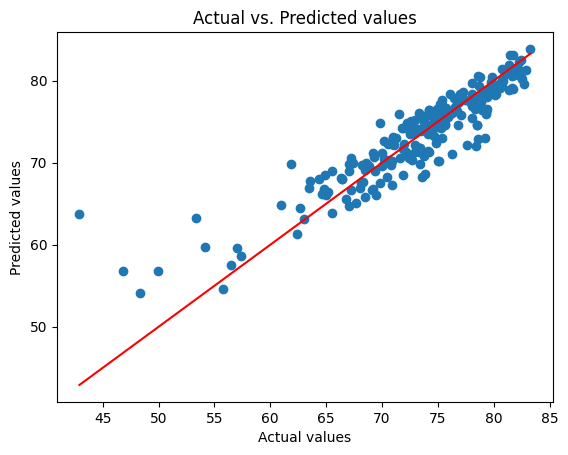

In [11]:
perform_regression(df)

In [12]:
print(perform_anova_test(df))

   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0    1143.0  6356.812212      0.0       NaN       NaN       NaN
1    1142.0  6356.779431      1.0  0.032782  0.005889  0.938843


### Principle Component Analysis

In [13]:
loadings, explained, cumulative = perform_pca(df)

Explained Variance Ratio:
PC1: 47.6653%
PC2: 16.0452%
PC3: 11.1107%
PC4: 8.9346%
PC5: 6.6946%
PC6: 4.4201%
PC7: 2.7226%
PC8: 1.5046%
PC9: 0.9023%

Cumulative Explained Variance:
PC1: 47.6653%
PC2: 63.7105%
PC3: 74.8213%
PC4: 83.7558%
PC5: 90.4504%
PC6: 94.8705%
PC7: 97.5932%
PC8: 99.0977%
PC9: 100.0000%


In [14]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Adolescent fertility rate,0.416065,-0.045986,0.006823,0.066937,-0.382788,0.207229,0.739209,-0.290196,-0.011565
Adults and children living with HIV,0.042963,0.025338,0.987719,0.122993,0.073151,0.009653,-0.015540,-0.021035,0.025843
Antiretroviral therapy coverage,-0.296223,0.453601,0.020203,0.138895,-0.526375,0.567240,-0.222980,0.074534,-0.180808
"Birth rate, crude",0.453940,0.081324,-0.044319,0.077003,0.001647,0.261385,-0.135426,0.466714,0.689162
Hospital beds,-0.305500,-0.381677,0.050738,-0.483525,0.251073,0.616645,0.081587,-0.179100,0.206399
Life expectancy at birth,-0.414530,0.325449,-0.031580,0.164329,-0.024919,-0.227741,0.116439,-0.467406,0.640103
People using safely managed drinking water services,-0.433745,0.145945,0.021332,0.041412,0.170585,-0.051130,0.598985,0.630300,-0.024937
Population growth,0.236623,0.536822,-0.092477,0.139320,0.677576,0.286256,0.074899,-0.206592,-0.196285
Unemployment,-0.148135,-0.473079,-0.097024,0.820515,0.138500,0.224067,-0.025710,-0.038255,-0.008981


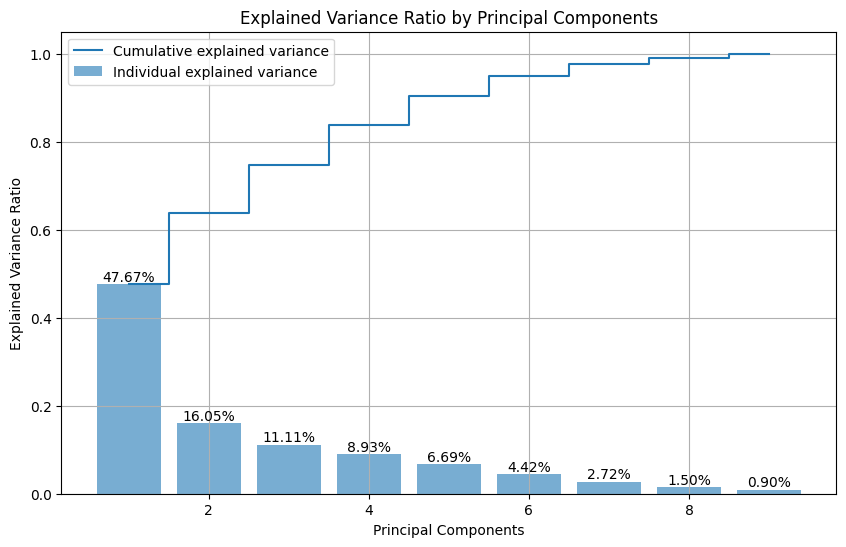

In [15]:
plot_variance_ratios(explained, cumulative)

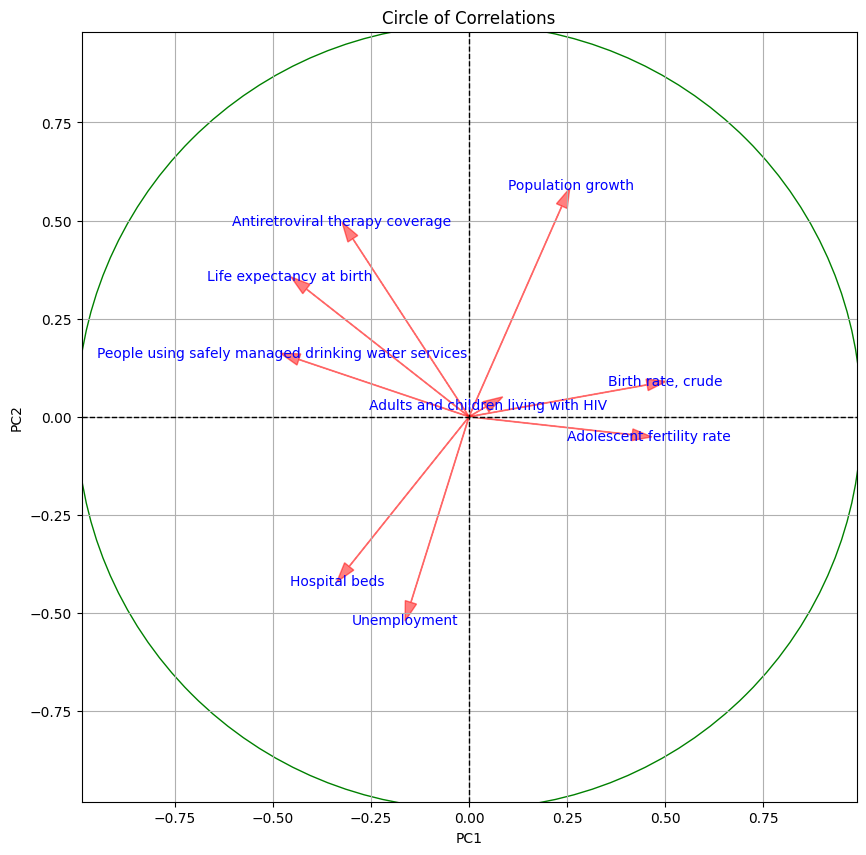

In [16]:
plot_circle_of_correlations(df)

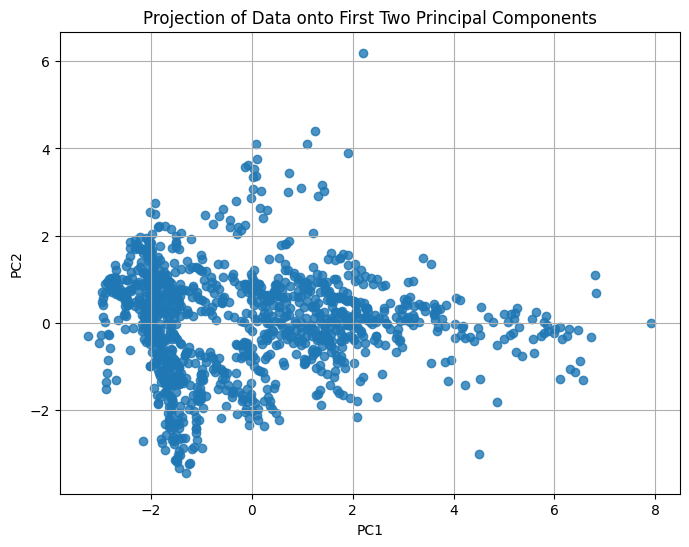

In [17]:
plot_projection(df)